**Name: Christ-Brian Amedjonekou**  
**Date: 03/18/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 4**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

#### Data description

The data we use for this worksheet are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cfm
from sklearn.metrics import f1_score as f1, precision_score as ps, recall_score as rs
from sklearn.utils import shuffle
import itertools as itr

In [2]:
part1 =  pd.read_csv('Datasets/RRLyrae_features.txt', delimiter= ',', names= ['Blue', 'Green', 'Yellow', 'Red'])
part2 =  pd.read_csv('Datasets/RRLyrae_labels.txt', names= ['Target'])
lyraeSet = pd.concat([part1, part2], axis= 1, sort= False)

In [3]:
lyraeSet.head()

,Blue,Green,Yellow,Red,Target
0,0.394000,1.250999,0.137000,0.061999,0.0
1,0.339001,1.048000,0.151999,0.023001,0.0
2,0.341999,1.008001,0.129000,0.203001,0.0
3,0.392000,0.965000,0.149000,0.150000,0.0
4,0.333000,1.040001,0.125999,0.101999,0.0


2\. Answer the following questions:

Is this a classification or regression problem?

* **Classification**

Is this supervised or unsupervised learning?

* **Supervised, target vector is present**

How many instances are in this data set? 

* $\mathbf{93141}$

How many features? What is their range?

* **4 features (colors: Blue, Green, Yellow, Red)**

How many RR Lyrae are in the data set? 

In [4]:
lyraeSet[lyraeSet['Target'] == 1].shape[0]

483

In [5]:
print('Amount of RR Lyrae Variable Stars: {}'.format(lyraeSet[lyraeSet['Target'] == 1].shape[0]))

Amount of RR Lyrae Variable Stars: 483


What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?

$$\frac{TP + TN}{TP + TN + FP + FN}$$


In [6]:
def TP_(positive_class= 1):
    """Returns the amount for the Positive Class"""
    amount = lyraeSet[lyraeSet['Target'] == positive_class].shape[0]
    total = lyraeSet['Target'].shape[0]
    difference = total - amount
    return (amount, total, difference)

In [7]:
accuracy__ = lambda TP, TN, total: (TP + TN)/total
precision__ = lambda TP, FP: TP/(TP + FP)
recall__ = lambda TP, FN: TP/(TP + FN)

In [8]:
# When 1 (RR Lyrae) is the positive class
accuracy__(0, TP_()[2], TP_()[1])

0.99481431378233

In [9]:
# When 0 (Non-RR Lyrae) is the positive class
accuracy__(TP_(0)[0], 0, TP_(0)[1])

0.99481431378233

**Very Unbalanced: Non-Lyrae are the most common**

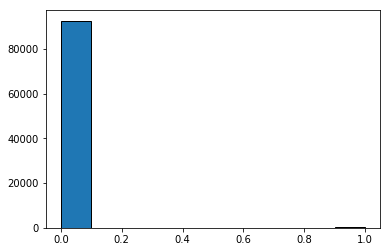

In [10]:
plt.hist(lyraeSet['Target'], edgecolor= 'k');

3\. Build a decision tree classifier for this data set, using an 80/20 train test split like last time. What is the performance on the test set?

In [11]:
# Creates the Model
lyraeModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets

Data = lyraeSet[['Blue', 'Green', 'Yellow', 'Red']]
Target = lyraeSet['Target']
xtrain, xtest, ytrain, ytest = tts(Data, Target, test_size= 0.2, 
                                   train_size= 0.8, random_state= 5)

# Now we'll fit the model with the training data
lyraeModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = lyraeModel.predict(xtest)

**Performance**

In [12]:
acc(ytest, ypred)

0.9952761822964196

In [13]:
ps(ytest, ypred)

0.5181818181818182

We can now implement the k-fold cross validation algorithm using the following syntax (note that this assumes that your algorithm is called 'model'):

http://scikit-learn.org/stable/modules/cross_validation.html

In [14]:
scores = cvs(lyraeModel, Data , Target , cv=5)
scores

array([0.99425627, 0.99463203, 0.99500778, 0.99543673, 0.99387985])

In [15]:
ypred1 = cvp(lyraeModel, Data, Target, cv=5)
ypred1

array([0., 0., 0., ..., 0., 0., 0.])

4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

In [16]:
scores

array([0.99425627, 0.99463203, 0.99500778, 0.99543673, 0.99387985])

In [17]:
score_info = (scores.mean(), scores.std())
print('Mean: {}, Standard Deviation: {}'.format(score_info[0], score_info[1]))

Mean: 0.9946425318929293, Standard Deviation: 0.0005468370415918771


5\. Calculate and plot the confusion matrix for your model (Note: you will need to copy/paste the "plot_confusion_matrix" function from one of the previous notebooks, and use the function cross_val_predict to get the predicted labels). 

In [18]:
#This is just a function that plots them
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, return_cm= False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if return_cm == False:
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itr.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    else:
        return cm

Confusion matrix, without normalization
[[18484    53]
 [   35    57]]


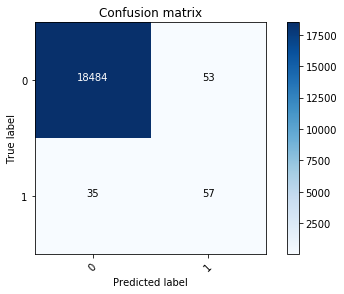

In [19]:
# Computes the confusion matrix
confuse_mtrx = cfm(ytest, ypred)
np.set_printoptions(precision=2)

# Creates a figure
plt.figure()

# Plots the non-normalized confusion matrix
plot_confusion_matrix(confuse_mtrx, classes=[0, 1],
                      title='Confusion matrix')

6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

In [20]:
answer_Q6 = plot_confusion_matrix(confuse_mtrx, 
                                  classes=[0, 1], 
                                  title='Confusion matrix', 
                                  return_cm= True)

print('Assuming 1 is the Positive Class')
print('True Positive: {} \nTrue Negative: {} \nFalse Positive: {} \nFalse Negative: {}'. format(answer_Q6[1][1], 
                                                                                                answer_Q6[0][0], 
                                                                                                answer_Q6[0][1], 
                                                                                                answer_Q6[1][0]))

Assuming 1 is the Positive Class
True Positive: 57 
True Negative: 18484 
False Positive: 53 
False Negative: 35


7\. Based on the definitions given on the slides, calculate accuracy, precision and recall. <b>Important:</b> You need to use the formula, not the built-in functions, and write the steps!

In [21]:
ttl = sum([answer_Q6[0,0], answer_Q6[1,1], answer_Q6[1,0], answer_Q6[0,1]])
accuracy__(answer_Q6[0,0], answer_Q6[1,1], ttl)

0.9952761822964196

In [22]:
precision__(answer_Q6[0,0], answer_Q6[1,0])

0.9981100491387224

In [23]:
recall__(answer_Q6[0,0], answer_Q6[0,1])

0.9971408534282786

8\. Which evaluation metric is used by the cross validation score above? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

Other evaluation metrics can be found in scikit using the code below.

More info: http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [24]:
print('Accuracy: {}'.format(acc(ytest, ypred)))    
print('Recall: {}'.format(rs(ytest, ypred)))      
print('Precision: {}'.format(ps(ytest, ypred)))   
print('F1 Score: {}'.format(f1(ytest, ypred)))  

Accuracy: 0.9952761822964196
Recall: 0.6195652173913043
Precision: 0.5181818181818182
F1 Score: 0.5643564356435643


9\. What happens to each of the metrics above if you flip y_test and y_pred in the above? 


In [25]:
print('Accuracy: {}'.format(acc(ypred, ytest)))    
print('Recall: {}'.format(rs(ypred, ytest)))      
print('Precision: {}'.format(ps(ypred, ytest)))   
print('F1 Score: {}'.format(f1(ypred, ytest)))  

Accuracy: 0.9952761822964196
Recall: 0.5181818181818182
Precision: 0.6195652173913043
F1 Score: 0.5643564356435643


**Nothing Happens to the FI Score or the Accuracy but Recall and Precision do a flip flop**



10\. To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_val_score function and report the mean and standard deviation of the scores associated to this evaluation metric.

Relevant docs: 

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [26]:
scores2 = cvs(lyraeModel, Data , Target , scoring= 'f1_weighted', cv=5)
scores2

array([0.99, 0.99, 1.  , 1.  , 0.99])

In [27]:
(scores2.mean(), scores2.std())

(0.9948812876093444, 0.0006791636536754457)

11\. It is now time to look at some diagnostics. Use an 80/20 training split (so each fold is 20% of the data, like in your cross validation). Report the f1 score obtained by your model
when applied to the training set (i.e. when you predict the labels of the training set). How does it compare with the cross validation score? Based on this result, do you think your algorithm suffers from high variance or high bias and why?

In [28]:
xtrain, xtest, ytrain, ytest = tts(Data, Target, test_size= 0.2, 
                                   train_size= 0.8, random_state= 5)

# Now we'll fit the model with the training data
lyraeModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = lyraeModel.predict(xtrain)

cvs_knockoff = []
for i in range(5):
    cvs_knockoff.append(f1(ytrain, ypred))
cvs_knockoff

[1.0, 1.0, 1.0, 1.0, 1.0]

Finally, we can look at learning curves. 

Give your data set a good shuffle using the following code:

In [29]:
Data, Target = shuffle(Data, Target, random_state=13)

To build learning curves, we need to check how the performance of our algorithm changes when using an increasing amount of data. We will check the scores that we obtain when using 20, 40, 60, 80 and 100% of our data set.

The following lines demonstrate how to do this to create a new, smaller data set that contains the first 20% of your original data set:    

In [30]:
number_samples = Data.shape[0] #total size of data set 
Data_little, Target_little = Data[:int(number_samples*0.2)][:], Target[:int(number_samples*0.2)] #what does this do?

12\. Calculate the mean and the standard deviation of the 5-fold cross validation score for the data set above (don't forget to use 'f1' as the scoring parameter of the 'cross_val_score' function, otherwise it will default to accuracy).

In [31]:
# 20 Percent
scores3 = cvs(lyraeModel, Data_little , Target_little , scoring= 'f1', cv=5)
print('Mean: {}; Standard Deviation: {}'.format(scores3.mean(), scores3.std()))

Mean: 0.4313876664906413; Standard Deviation: 0.049600926472618705


13\. Now do the same but using 40, 60, 80 and 100% of your data set. 

In [32]:
# 40 Percent
number_samples = Data.shape[0] #total size of data set 
Data_little, Target_little = Data[:int(number_samples*0.4)][:], Target[:int(number_samples*0.4)] #what does this do?
scores4 = cvs(lyraeModel, Data_little , Target_little , scoring= 'f1', cv=5)
print('Mean: {}; Standard Deviation: {}'.format(scores4.mean(), scores4.std()))

Mean: 0.5097614969160461; Standard Deviation: 0.04914211599460979


In [33]:
# 60 Percent
number_samples = Data.shape[0] #total size of data set 
Data_little, Target_little = Data[:int(number_samples*0.6)][:], Target[:int(number_samples*0.6)] #what does this do?
scores5 = cvs(lyraeModel, Data_little , Target_little , scoring= 'f1', cv=5)
print('Mean: {}; Standard Deviation: {}'.format(scores5.mean(), scores5.std()))

Mean: 0.4983447314377896; Standard Deviation: 0.07523660575509351


In [34]:
# 80 Percent
number_samples = Data.shape[0] #total size of data set 
Data_little, Target_little = Data[:int(number_samples*0.8)][:], Target[:int(number_samples*0.8)] #what does this do?
scores6 = cvs(lyraeModel, Data_little , Target_little , scoring= 'f1', cv=5)
print('Mean: {}; Standard Deviation: {}'.format(scores6.mean(), scores6.std()))

Mean: 0.5184562630510162; Standard Deviation: 0.02896073724086796


In [35]:
# 100 Percent
number_samples = Data.shape[0] #total size of data set 
Data_little, Target_little = Data[:int(number_samples)][:], Target[:int(number_samples)] #what does this do?
scores7 = cvs(lyraeModel, Data_little , Target_little , scoring= 'f1', cv=5)
print('Mean: {}; Standard Deviation: {}'.format(scores3.mean(), scores3.std()))

Mean: 0.4313876664906413; Standard Deviation: 0.049600926472618705


14\. Based on the results you obtained, do you think getting more training data would help? (Justify your answer).

https://skymind.ai/wiki/accuracy-precision-recall-f1

* **The F1 score is considered the overall measure of a model’s accuracy that combines precision and recall.**
* **A good F1 score means that you have low false positives and low false negatives.**
* **Also an F1 score is considered perfect when it’s 1, while the model is a total failure when it’s 0.**


* **What we have here is an 5 F1 scores that have a mean of about 44%, meaning we have a good amount of false positives or negatives. This makes sense since our data is not balanced. Therefore, more training data should help only if it makes the dataset balance.**


<b> Extra Credit </b>

15\. Save the values and plot the f1 score for the 5 models in a plot where "percentage of the data set used" (20, 40, ... 100%) is on the x axis and 'F1 score' is on the y axis. 

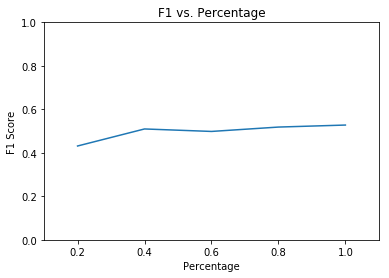

In [36]:
xLabel = [0.2, 0.4, 0.6, 0.8, 1.0]
fig, ax1 = plt.subplots()
scores_agg = [scores3.mean(), scores4.mean(),
              scores5.mean(), scores6.mean(), scores7.mean()]
ax1.plot(xLabel, scores_agg)
ax1.set(xlabel= 'Percentage', ylabel= 'F1 Score', 
        title= 'F1 vs. Percentage', xlim= (0.1, 1.1),
        ylim= (0, 1));

16\. Do the same as above, but this time create an error bar plot where the y errors are given by the standard deviation of the scores you obtained in the 5 folds of the cross-validation. Why is the standard deviation information useful?

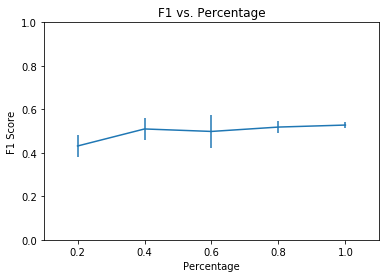

In [37]:
fig, ax2 = plt.subplots()
scores_agg_ = [scores3.std(), scores4.std(),
              scores5.std(), scores6.std(), scores7.std()]
ax2.errorbar(xLabel, scores_agg, scores_agg_)
ax2.set(xlabel= 'Percentage', ylabel= 'F1 Score', 
        title= 'F1 vs. Percentage', xlim= (0.1, 1.1),
        ylim= (0, 1));